In [5]:
import librosa
import librosa.display

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
import os
from tqdm import tqdm
import numpy as np
import pandas as pd

from utils import get_data_dict

In [9]:
path_dict = get_data_dict('..\\data\\train\\audio')
del path_dict['_background_noise_']

In [13]:
samples_per_category = [len(path_dict[i]) for i in path_dict]

In [14]:
print(f'samples_num: {sum(samples_per_category)}')

samples_num: 64721


<BarContainer object of 30 artists>

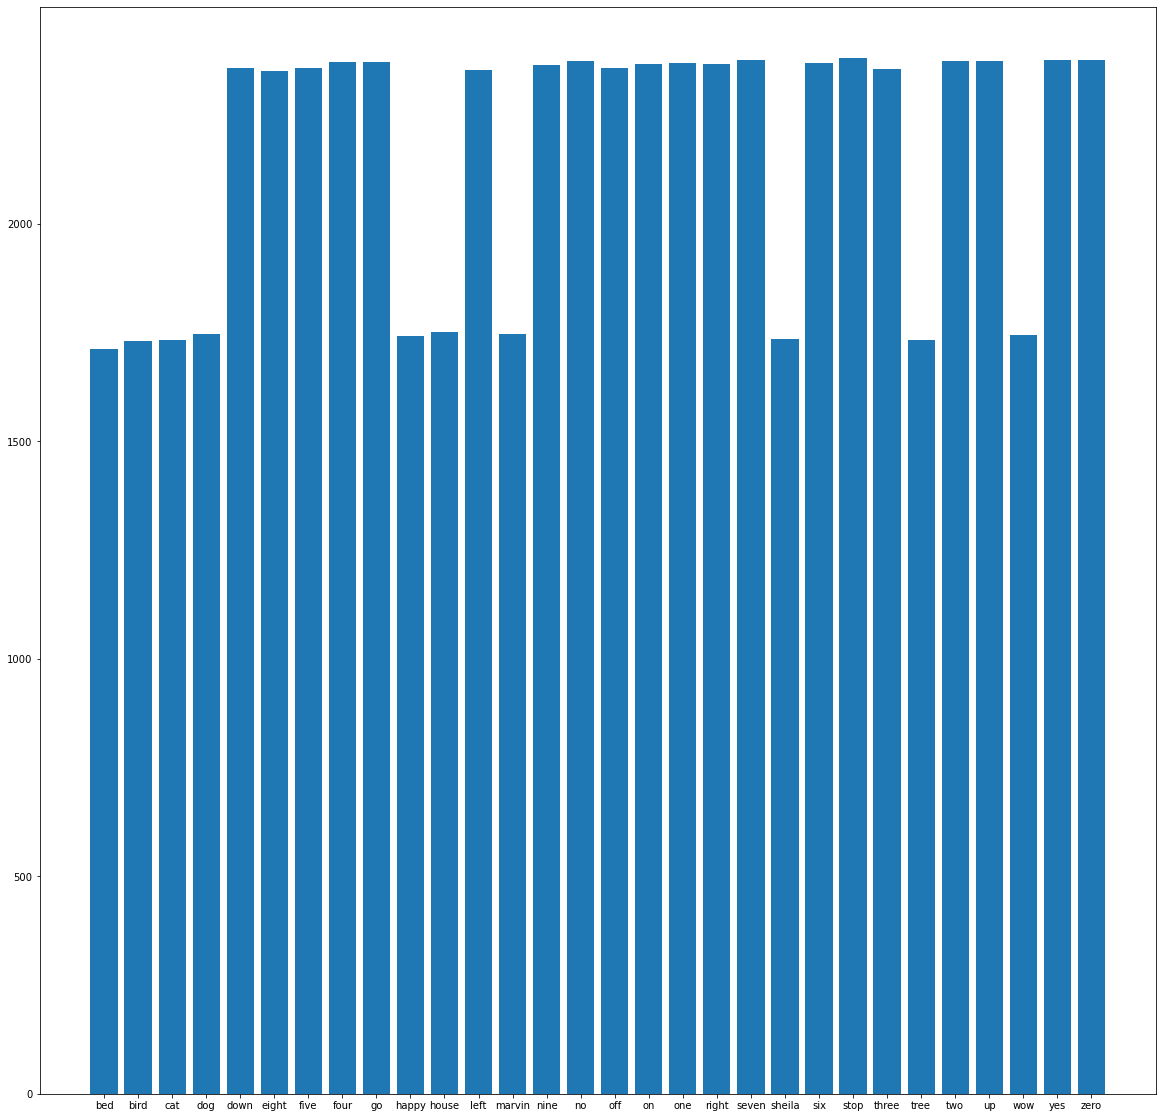

In [20]:
plt.bar(path_dict.keys(), samples_per_category)

In [8]:
durations = {k:[] for k in path_dict.keys()}

for key in tqdm(path_dict.keys()):
    for value in path_dict[key]:
        try:
            X, sr = librosa.load(value, res_type='kaiser_fast')
            durations[key].append(librosa.core.get_duration(X, sr))
        except:
            continue

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [06:32<00:13, 13.42s/it]c:\users\oleksandr.vaitovych\pycharmprojects\course_project\venv\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [06:35<00:00, 12.74s/it]


In [10]:
for i in durations.keys():
    print(i)
    print(np.unique(durations[i]))

bed
[0.46938776 0.51201814 0.55469388 0.60376417 0.65020408 0.68272109
 0.69664399 0.70403628 0.72539683 0.7430839  0.74671202 0.76802721
 0.78938776 0.78952381 0.81070295 0.8214059  0.83596372 0.85337868
 0.87469388 0.88240363 0.89600907 0.90566893 0.90671202 0.92884354
 0.93873016 0.96       0.97528345 0.9814059  0.99201814 1.        ]
bird
[0.49070295 0.51201814 0.55469388 0.55732426 0.59741497 0.64
 0.65020408 0.68272109 0.69664399 0.72539683 0.73600907 0.7430839
 0.74671202 0.76802721 0.78952381 0.81070295 0.83596372 0.85337868
 0.88240363 0.88539683 0.89600907 0.92884354 0.93873016 0.96
 0.97070295 0.97528345 0.9814059  1.        ]
cat
[0.51088435 0.51201814 0.55469388 0.59741497 0.60376417 0.64
 0.65020408 0.68272109 0.69664399 0.70403628 0.72539683 0.73600907
 0.7430839  0.76802721 0.78952381 0.81070295 0.8214059  0.83596372
 0.85337868 0.87469388 0.88240363 0.88539683 0.89600907 0.92884354
 0.93873016 0.97528345 0.9814059  1.        ]
dog
[0.46444444 0.46938776 0.51201814 0.55

In [57]:
with open('..\\data\\train\\validation_list.txt', 'r') as f:
    val_list = f.readlines()
print(len(val_list))

val_list = list(map(lambda x: '..\\data\\train\\audio\\'+x.replace('\n', '').replace('/', '\\'), val_list))

6798


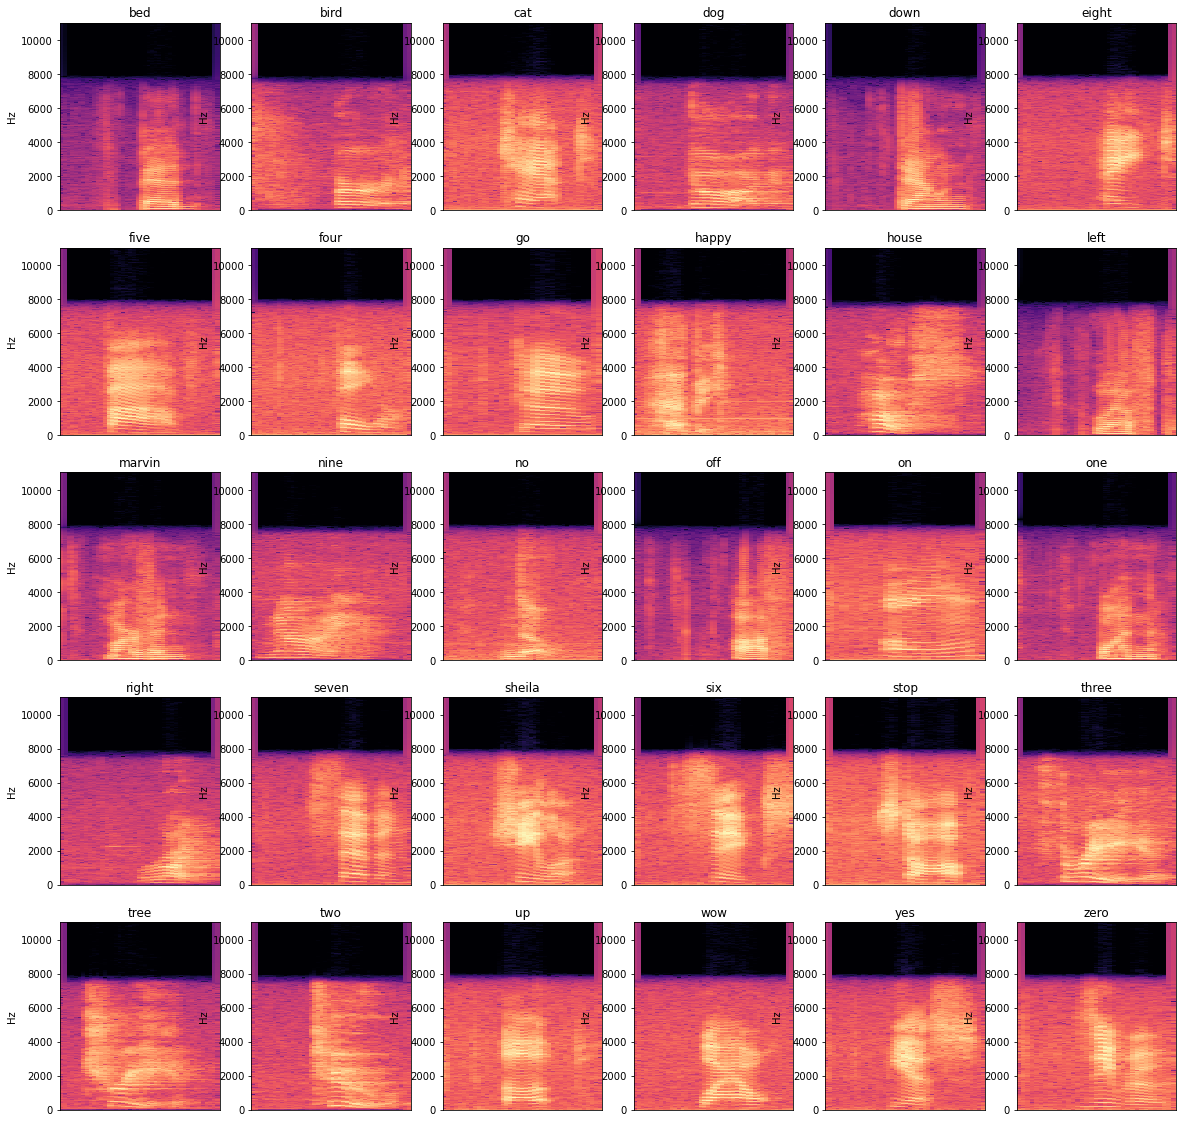

In [10]:
fig = plt.figure(figsize=(5, 6))
fig.set_size_inches(20,20)
keys = list(path_dict.keys())
ax = []
for i in range(1, 31):
    img = librosa.stft(librosa.load(path_dict[keys[i-1]][0])[0])
    ax.append(fig.add_subplot(5, 6, i))
    ax[-1].set_title(keys[i-1])
    librosa.display.specshow(librosa.power_to_db(img, ref=np.max), y_axis='linear')
plt.show()


In [66]:
from utils import mel_spec_to_img

for i in path_dict:
    for j in path_dict[i]:
        mel_spec_to_img(j, j.replace('audio', 'images').replace('wav', 'png'))

In [27]:
from utils import get_features

labels = {k: [0 for i in range(len(path_dict))] for k in path_dict}
count = 0
for i in labels:
    labels[i][count] = 1
    count += 1

In [29]:
train_features = []
val_features = []
train_labels = []
val_labels = []

for k in path_dict.keys():
    for v in tqdm(path_dict[k]):
        if v not in val_list:
            train_features.append(get_features(v))
            train_labels.append(labels[k])
        else:
            val_features.append(get_features(v))
            val_labels.append(labels[k])

 35%|███████████████████████████▌                                                   | 598/1713 [01:05<02:43,  6.81it/s]c:\users\oleksandr.vaitovych\pycharmprojects\course_project\venv\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
100%|██████████████████████████████████████████████████████████████████████████████| 2376/2376 [03:35<00:00, 11.01it/s]


In [32]:
import pandas as pd

train_df = pd.DataFrame(train_features)
train_df['labels'] = train_labels

val_df = pd.DataFrame(val_features)
val_df['labels'] = val_labels

train_df.to_csv('..\\data\\train\\train_df.csv', index=False)
val_df.to_csv('..\\data\\train\\val_df.csv', index=False)